In [1]:
## Cutting fligh logs and keeping the samples correpondent to video

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

import sys

sys.path.append("../codes/")

from video_handling import videoObj

../codes/video_handling.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
df = pd.read_csv("../data/v1/flightlogs/CEFET/2019-10-31_17-48-21_v2.csv")
df[df['isTakingVideo']==True].head()

,latitude,longitude,altitude(m),ultrasonicHeight(m),speed(mps),distance(m),max_altitude(m),max_ascent(m),max_speed(mps),max_distance(m),...,rcTransform,rcJoystickMode,appMode,FlyControllerSerialNumber_legacy,RemoteSerialNumber_legacy,BatterySerialNumber_legacy,Battery2SerialNumber,frontAvoidDist,backAvoidDist,isBrakingToAvoid
419,-22.705080,-43.461131,40.3,0.0,0.14,174.91,40.4,40.4,8.3,175.33,...,0,2,1,NaN,NaN,NaN,NaN,0.0,0.0,0
420,-22.705080,-43.461131,40.3,0.0,0.32,174.90,40.4,40.4,8.3,175.33,...,0,2,1,NaN,NaN,NaN,NaN,0.0,0.0,0
421,-22.705080,-43.461131,40.3,0.0,0.51,174.89,40.4,40.4,8.3,175.33,...,0,2,1,NaN,NaN,NaN,NaN,0.0,0.0,0
422,-22.705080,-43.461131,40.3,0.0,0.73,174.86,40.4,40.4,8.3,175.33,...,0,2,1,NaN,NaN,NaN,NaN,0.0,0.0,0
423,-22.705079,-43.461131,40.3,0.0,0.91,174.83,40.4,40.4,8.3,175.33,...,0,2,1,NaN,NaN,NaN,NaN,0.0,0.0,0


In [4]:
df[df['isTakingVideo'] == True]['time(millisecond)'].iloc[-1] - df[df['isTakingVideo'] == True]['time(millisecond)'].iloc[0]

273877

In [5]:
# df.keys().tolist()

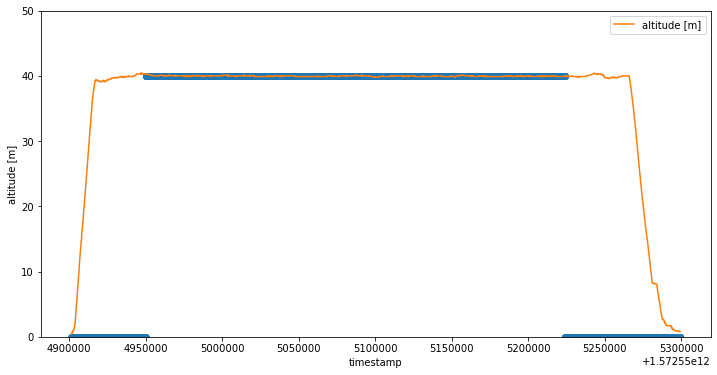

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df['timestamp'], 40*df['isTakingVideo'], 'o', )
plt.plot(df['timestamp'],  df['altitude(m)'], label='altitude [m]')
plt.legend()
plt.ylim([0, 50])
plt.ylabel('altitude [m]')
plt.xlabel('timestamp')
plt.show()

[ 418 2866]


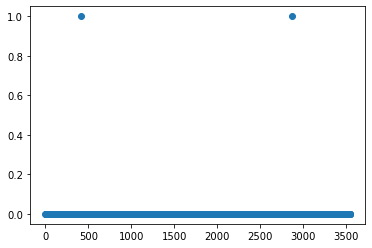

In [7]:
mask = df['isTakingVideo'] == True
diff = np.diff(mask)

plt.plot(diff, 'o')

breaking_indexes = np.where(diff == 1)[0]
print(breaking_indexes)

In [8]:
split_dfs = np.split(df, breaking_indexes+1, axis=0)
len(split_dfs)

3

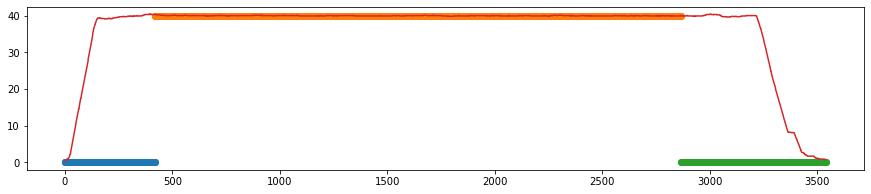

In [9]:
plt.figure(figsize=(15,3))
for d in range(len(split_dfs)):    
    plt.plot(40*split_dfs[d]['isTakingVideo'], 'o')
    
plt.plot(df['altitude(m)'])

In [10]:
def split_df(df):
    mask = df['isTakingVideo'] == True
    diff = np.diff(mask)
    breaking_indexes = np.where(diff == 1)[0]
    split_df = np.split(df, breaking_indexes+1, axis=0)
    
    return split_df    

In [11]:
list_csvs = glob.glob("../data/v1/flightlogs/CEFET/2019-10-31_17-48-21_v2.csv", recursive=True)

In [12]:
for csv in list_csvs:
    df = pd.read_csv(csv)
    splitted_dfs = split_df(df)
    
    count = 0
    part = 0
    for splitted_df in splitted_dfs:
        if count % 2 != 0:           
            #uncomment the following line to save the csv
#             splitted_df.to_csv(csv.replace('.csv', f'_part{part}.csv'), index=False)
            part += 1
        count += 1    

0.8463499999999999

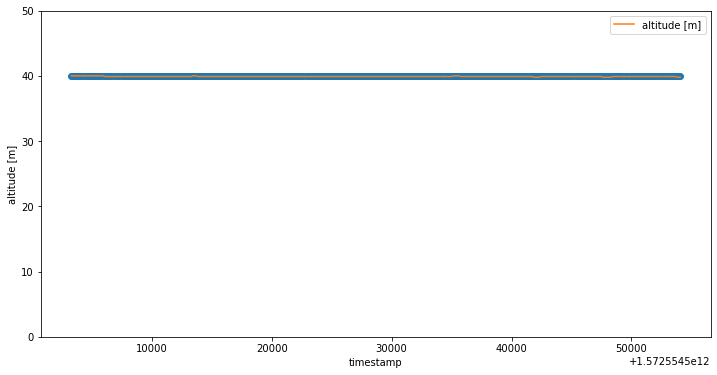

In [13]:
df_part = pd.read_csv('../data/v1/flightlogs/CEFET/2019-10-31_17-36-41_v2_talvez 2_part1.csv')

plt.figure(figsize=(12,6))
plt.plot(df_part['timestamp'], 40*df_part['isTakingVideo'], 'o', )
plt.plot(df_part['timestamp'], df_part['altitude(m)'], label='altitude [m]')
plt.legend()
plt.ylabel('altitude [m]')
plt.xlabel('timestamp')
plt.ylim([0, 50])

(df_part['time(millisecond)'].iloc[-1] - df_part['time(millisecond)'].iloc[0])/1e3/60

## PROCESSING

In [14]:
# inteporlating so that each sample in fligh log corresponds to a frame in video

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
video_name = "20180919_rectified_DJI_0019"
df = pd.read_csv(f"../data/v1/flightlogs/{video_name}.csv")

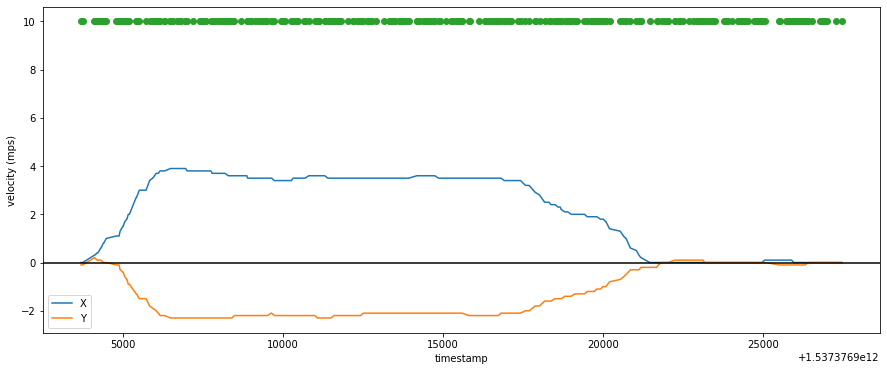

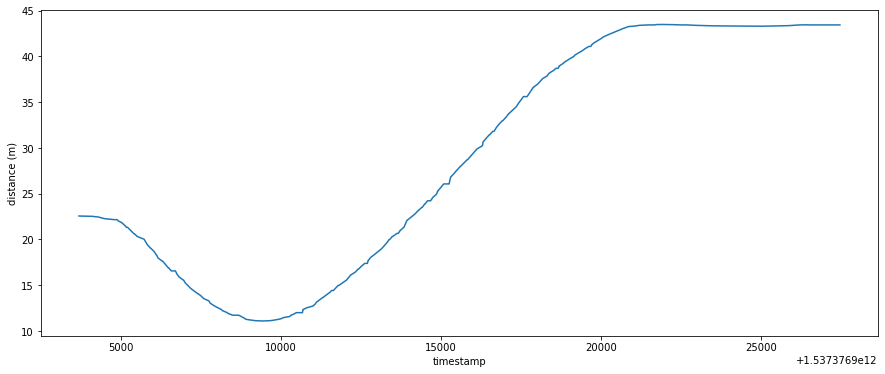

In [17]:
# df['velocity(mps)'] = np.sqrt(df['velocityX(mps)']**2 + df['velocityY(mps)']**2)

plt.figure(figsize=(15,6))
plt.plot(df['timestamp'], df['velocityX(mps)'])
plt.plot(df['timestamp'], df['velocityY(mps)'])
# plt.plot(df['timestamp'], df['velocity(mps)'])



plt.plot(df['timestamp'], 10*df['isTakingVideo'], 'o')
plt.axhline(c='k')

plt.xlabel('timestamp')
plt.ylabel('velocity (mps)')
plt.legend(['X', 'Y'])

# plt.xlim([6300000+1.55939e12,6500000+1.55939e12])
plt.show()
plt.figure(figsize=(15,6))

plt.plot(df['timestamp'], df['distance(m)'])
# plt.plot(df['timestamp'], df['altitude(m)'])

plt.xlabel('timestamp')
plt.ylabel('distance (m)')
# plt.xlim([6300000+1.55939e12,6500000+1.55939e12])
plt.show()


In [18]:
df_copy = df.copy()
# df_copy.set_index('time(millisecond)', inplace=True)
df_copy.index = pd.to_timedelta(df_copy['time(millisecond)'],  unit='ms') - pd.to_timedelta(df_copy['time(millisecond)'],  unit='ms')[0]
df_copy['datetime(utc)']

time(millisecond)
00:00:00           2018-09-19 17:08:23.681
00:00:00.018000    2018-09-19 17:08:23.699
00:00:00.053000    2018-09-19 17:08:23.734
00:00:00.414000    2018-09-19 17:08:24.095
00:00:00.426000    2018-09-19 17:08:24.107
                            ...           
00:00:23.223000    2018-09-19 17:08:46.904
00:00:23.229000    2018-09-19 17:08:46.911
00:00:23.313000    2018-09-19 17:08:46.994
00:00:23.576000    2018-09-19 17:08:47.257
00:00:23.774000    2018-09-19 17:08:47.455
Name: datetime(utc), Length: 296, dtype: object

In [19]:
import numpy as np

def resample(dataframe, freq='42ms'):
    # https://stackoverflow.com/questions/49191998/pandas-dataframe-resample-from-irregular-timeseries-index/55654486
    resample_index = pd.timedelta_range(start=dataframe.index[0], end=dataframe.index[-1], freq=freq)
    
#     dataframe['datetime(utc)'] = dataframe['datetime(utc)'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))
    
    
#     dataframe = dataframe[~dataframe.index.duplicated()]
    dummy_frame = pd.DataFrame(np.NaN, index=resample_index, columns=dataframe.columns)
    

   
    new_df = dataframe.combine_first(dummy_frame).interpolate('time').resample(freq).asfreq()
    
    return new_df

In [21]:
df_interp = resample(df_copy)
# uncomment the following line to save the csv
# df_interp.to_csv(f"../data/v1/flightlogs/{video_name}_interp.csv")
df_interp

,latitude,longitude,altitude(m),ultrasonicHeight(m),speed(mps),distance(m),max_altitude(m),max_ascent(m),max_speed(mps),max_distance(m),...,rcTransform,rcJoystickMode,appMode,FlyControllerSerialNumber_legacy,RemoteSerialNumber_legacy,BatterySerialNumber_legacy,Battery2SerialNumber,frontAvoidDist,backAvoidDist,isBrakingToAvoid
00:00:00,-22.862593,-43.230735,15.400000,0.0,0.100000,22.560000,15.5,15.5,4.63,22.61,...,0.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
00:00:00.042000,-22.862593,-43.230735,15.400000,0.0,0.100000,22.553143,15.5,15.5,4.63,22.61,...,0.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
00:00:00.084000,-22.862593,-43.230735,15.391413,0.0,0.123186,22.547424,15.5,15.5,4.63,22.61,...,0.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
00:00:00.126000,-22.862593,-43.230735,15.379778,0.0,0.154598,22.543934,15.5,15.5,4.63,22.61,...,0.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
00:00:00.168000,-22.862593,-43.230735,15.368144,0.0,0.186011,22.540443,15.5,15.5,4.63,22.61,...,0.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:00:23.604000,-22.862125,-43.231047,15.000000,0.0,0.000000,43.430000,15.5,15.5,4.63,43.48,...,0.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
00:00:23.646000,-22.862125,-43.231047,15.000000,0.0,0.000000,43.430000,15.5,15.5,4.63,43.48,...,0.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
00:00:23.688000,-22.862125,-43.231047,15.000000,0.0,0.000000,43.430000,15.5,15.5,4.63,43.48,...,0.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
00:00:23.730000,-22.862125,-43.231047,15.000000,0.0,0.000000,43.430000,15.5,15.5,4.63,43.48,...,0.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [22]:
video = videoObj(f"../data/v1/videos/{video_name}.avi")
video.videoInfo.getNumberOfFrames()

565

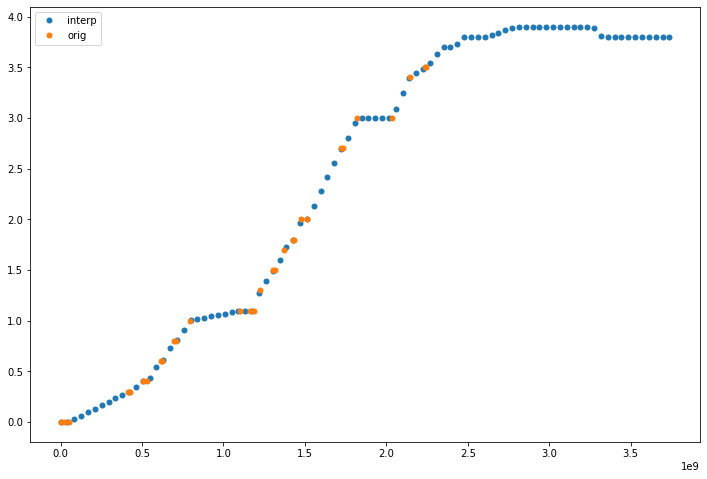

In [24]:
tag = 'velocityX(mps)'

plt.figure(figsize=(12,8))
plt.plot(df_interp.index[0:90], df_interp[tag][0:90], '.', markersize=10)
plt.plot(df_copy.index[0:30], df_copy[tag][0:30], '.', markersize=10)

# df_interp.reset_index().plot.scatter(x='index', y=tag)
# df_copy.reset_index().plot.scatter(x='index', y=tag)

plt.legend(['interp', 'orig'])

plt.show()

In [25]:
df_interp.shape

(567, 92)